<a href="https://colab.research.google.com/github/RodzynDev/WSBJavaHotelOOP/blob/master/Wprowadzenie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wprowadzenie do pracy w Google Colab
Google Colab bazuje na Jupyter Notebook.

**Aby uruchomić kod kliknij we fragment kodu i wciśnij Ctrl+Enter**
## Import pakietów
Punktem wyjścia do prac będa pakiety numpy, pandas i csv umozliwiajace kolejno: wygodne obliczenia i operacje na wektorach, reprezenacje i wizualizację dużych porcji danych, wczytywanie danych treningowych z formatu CSV.
Oprócz tego w przypadku korzystania z Google Colab koniecznym będze import modułów pozwalajacych na upload plików z danymi treningowymi na serwer.

In [1]:
import pandas as pd
import numpy as np
import csv
from google.colab import files
import io

## Podstawy podstaw Pythona
(Pomiń to jeśli wiesz o Pythonie cokolwiek)
Python jest jednym z najpopularniejszych (obok R) językiem wykorzystywanym w szeroko rozumianej Data Science.
W Pythonie możliwe jest programowanie obiektowe, programowanie strukturalne i programowanie funkcyjne. Typy sprawdzane są dynamicznie, a do zarządzania pamięcią stosuje się garbage collection.

Dla osób, które nie miały nigdy nic wspólnego z Pythonem, sugeruję przejrzenie [Tutorialu](https://docs.python.org/3/tutorial/) i innych materiałów dostępnych w sieci.

In [ ]:
# deklaracja zmiennych -- dynamiczne typowanie
x=12
y='tekst'

# Python ma silne typowanie --  przy wypisywaniu zmiennych numerycznych i
# konkatenacji ze stringiem, konieczna jest konwersja explicite do string
print('To są moje zmienne: '+str(x)+' '+y)

# Listy zapisuje się w notacji podobnej do Prologa, Matlaba, Octava
lista = [1,2,3,4.5]
print('to lista '+str(lista))

# Mimo, że Python jest językiem (również) obiektowym, to wiele funkcji
# uzywanych jest jak globalne

dl = len(lista)
print('Długośćlisty to: '+str(dl))

# Pętle i instrukcje warunkowe (wcięcia są ważne!)
for element in lista:
  print(element)

if x < 10:
  print('Mniejsze od 10')
else:
  print('Może 10, może wiecej')


To są moje zmienne: 12 tekst
to lista [1, 2, 3, 4.5]
Długośćlisty to: 4
1
2
3
4.5
Może 10, może wiecej


In [ ]:
# Iterowanie po elementach listy a wydajność
duza_lista = np.random.randint(2, size=10000000)

# Policz ile jest 1-nek
import time

start = time.time()
print(len(duza_lista[duza_lista==1]))
stop = time.time()
print('Czas wykonania: ' + str(stop-start))

start = time.time()
print(sum([1 for e in duza_lista if e == 1]))
s = 0
stop = time.time()
print('Czas wykonania: ' + str(stop-start))


start = time.time()
for e in duza_lista:
  if e == 1: s+=1
print(s)
stop = time.time()
print('Czas wykonania: ' + str(stop-start))


4999735
Czas wykonania: 0.12984371185302734
4999735
Czas wykonania: 2.344590902328491
4999735
Czas wykonania: 3.667656183242798


In [ ]:
# Definiowanie funkcji -- nigdy nie staraj się definiowac funkcji, które już są.
def srednia(lista):
  return sum(lista)/len(lista)

start = time.time()
print('Srednia z listy to '+str(srednia(duza_lista)))
stop = time.time()
print('Czas wykonania: ' + str(stop-start))

start = time.time()
print('Srednia z listy to '+str(np.mean(duza_lista)))
stop = time.time()
print('Czas wykonania: ' + str(stop-start))

Srednia z listy to 0.4999735
Czas wykonania: 1.7506041526794434
Srednia z listy to 0.4999735
Czas wykonania: 0.022312164306640625


In [ ]:
# Słowniki to tablice asocjacyjne
dict = {'Name': 'Zara', 'Age': 21, 'Class': 'Machine Learning'}
dict['Age'] = 22; # update existing entry
dict['School'] = "AGH"; # Add new entry

print("dict['Age']: ", dict['Age'])
print("dict['School']: ", dict['School'])

dict['Age']:  22
dict['School']:  AGH


## Wczytywanie plików
Poniżej przyklad wczytania pliku z danymi treningowymi, załadowania go do DataFrame i wyświetlenia.
Zwróć uwagę, że podczas uploadu można wybrać więcej plików niż jeden.
Plik, który należy załadować znajdue się na Moodle **House sales**

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['kc_house_data.csv'].decode('utf-8')))
df

KeyboardInterrupt: 

lub

In [ ]:
df = pd.read_csv('kc_house_data.csv')
df

## Manipulowanie DataFrame
Wybieranie danych z DF odbywa sie intuicyjnie, poprzez podanie nazwy kolumny, lub listy kolumn w **nawiasach kwadratowych**

In [ ]:
# wybierz tylko jedną kolumnę
bedrooms = df['sqft_living']

# wybierz dwie kolumny
bedprice = df[['sqft_living', 'price']]


# zrób wykres ceny względem powierzchni
bedprice.plot.scatter(x='sqft_living',y='price')

In [ ]:
# Indeksy -- każdy wiersz jest indeksowany domyślnie integerem.
bedprice.index
print('Here is what we have at the index 1210: ')
print(bedprice.loc[1210])
print(bedprice.iloc[1210])


In [ ]:
# Zmiana indeksowania może generować nieoczekiwane wyniki podczas wybierania danych

bedprice.set_index('sqft_living', inplace=True)
print('Here is what we have at the index 1210: ')
print(bedprice.loc[1210])
print(bedprice.iloc[1210])


In [ ]:
# Tworzymy nową dataframe z nowymi danymi z wykorzystaniem Series
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

df = pd.DataFrame({ 'City name': city_names, 'Population': population })
df

In [ ]:
# Worzymy nową z wykorzystaniem słowników
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df

In [ ]:
#Modyfikujemy oryginalną mimo, że możemy podejrzewać, że tak się nie stanie
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[0:1]
df_sub.x = 'Trzeci'
print(df)
print(df_sub)


In [ ]:
#Jeśil chcemy pracować na kopii, to explicite:
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[0:1].copy()
df_sub.x = 'Trzeci'
print(df)
print(df_sub)


In [ ]:

#Yikes... Nie wiadomo co się stanie -- raz wartość w df zostanie zmieniona, raz nie
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[['x','y']]
df_sub['x'][0] = 'Czwarty'
print(df)
print(df_sub)



In [ ]:
# Dodanie nowej kolumny do DF, z domyślną wartością
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df['Z'] = -1
df.loc[:,'Kolejna'] = -2
df

In [ ]:
#Zmiana wartości poprawnie to uzywamy loc.
#Unikamy tzw. chained indexing [a][b][c] na rzecz loc[a,b,c]:
df = pd.DataFrame({'x': ['Pierwszy','Drugi'], 'y':[222,333]})
df_sub = df[['x','y']]
df_sub.loc[0,'x'] = 'Piąty'
print(df)
print(df_sub)

In [ ]:
# Iterowanie po wierszach DF różni sie trochę od iterowania po listach
bedprice = df[['sqft_living', 'price']]
# nie o to nam chodziło (nagłówek tez jest wierszem)
for row in bedprice:
  print('Powierzchnia: '+str(row[0]), 'cena: '+str(row[1]))

# nieźle i wygodnie
for idx, row in bedprice.iterrows():
  print('Powierzchnia: '+str(row['sqft_living']), 'cena: '+str(row['price']))

# czasem o niebo szybciej niż powyższe
for idx, row in bedprice.itertuples():
  print('Powierzchnia: '+str(getattr(row,'sqft_living')), 'cena: '+str(getattr(row,'price')))


## Operacje na wektorach
Do operacji na wektorach można używac wymiennie pakietu numpy, albo Pandas.

In [ ]:
# iloczyn skalarny kolumny 'price' z użyciem Pandas
res = df['price'].dot(df['price'])
print(res)

# iloczyn skalarny kolumny 'price' z użyciem numpy
# values zwraca surową tablicę numpy
numpy_vals = df['price'].values
res = numpy_vals.dot(numpy_vals)
print(res)


# Zadania
## Wczytaj plik z danymi z Moodle - **Crimes**
Przeczytaj opis zbioru danych nim zaczniesz pracę nad dalszymi zadaniami: [Opis](http://archive.ics.uci.edu/ml/datasets/communities+and+crime+unnormalized)
**Zwróć uwagę, że niektórych danych brakuje** Dane takie są zastąpione znakiem *?*.
Możesz postąpić z tymi danymi w następujacy sposób
  1. Zastąpić je wartośćią `np.NaN`
  2. Usunąć rekordy z brakujacymi danymi
  3. Uzupełnić je średnią, mediana, lub dominantą
  4. Zastosować coś bardziej fancy, np. [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html#sklearn.preprocessing.Imputer)


In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['crimes.csv'].decode('utf-8')))
df

Saving crimes.csv to crimes.csv


,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,?,?,10,56216,3.07,6.87,61.68,15.23,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,Pinevillecity,LA,?,?,10,12251,2.68,21.18,76.65,1.52,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,Yucaipacity,CA,?,?,10,32824,2.46,0.52,92.62,0.98,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,Beevillecity,TX,?,?,10,13547,2.89,3.37,69.91,0.90,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87


In [3]:
data = pd.read_csv('crimes.csv', na_values='?')
data_cleaned = data.dropna()
data_cleaned

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
54,Toledocity,OH,95.0,77000.0,1,332943,2.54,19.70,76.96,1.05,...,5502.0,1698.29,15251.0,4707.51,4517.0,1394.26,357.0,110.19,984.96,7910.25
55,Philadelphiacity,PA,101.0,60000.0,1,1585577,2.63,39.86,53.52,2.74,...,15117.0,988.14,39181.0,2561.10,23785.0,1554.73,2282.0,149.17,1279.60,5253.14
58,Lynchburgcity,VA,680.0,47672.0,1,66049,2.63,26.41,72.45,0.76,...,560.0,833.83,2316.0,3448.48,184.0,273.97,50.0,74.45,753.42,4630.73
99,NewHaventown,CT,9.0,52070.0,1,130474,2.66,36.14,53.85,2.41,...,3417.0,2856.93,7719.0,6453.80,1873.0,1566.00,134.0,112.04,2127.02,10988.76
122,Springfieldcity,OH,23.0,74118.0,1,70487,2.59,17.38,81.61,0.51,...,963.0,1362.13,4048.0,5725.76,457.0,646.41,6.0,8.49,1497.92,7742.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,WestAlliscity,WI,79.0,85300.0,10,63221,2.36,0.30,98.23,0.63,...,423.0,684.99,2059.0,3334.25,265.0,429.13,42.0,68.01,236.43,4516.38
2097,VirginiaBeachcity,VA,810.0,82000.0,10,393069,2.90,13.91,80.50,4.33,...,3261.0,748.01,14812.0,3397.57,1195.0,274.11,200.0,45.88,286.27,4465.56
2116,CherryHilltownship,NJ,7.0,12280.0,10,69348,2.83,3.23,89.79,6.14,...,612.0,846.79,2158.0,2985.90,424.0,586.66,5.0,6.92,208.93,4426.27
2200,FallRivercity,MA,5.0,23000.0,10,92703,2.49,1.03,97.17,1.33,...,334.0,371.47,707.0,786.32,419.0,466.01,0.0,0.00,640.62,1623.79


## Wyświetl 10 pierwszych wierszy pliku

In [4]:
data_cleaned.head(10)

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
54,Toledocity,OH,95.0,77000.0,1,332943,2.54,19.70,76.96,1.05,...,5502.0,1698.29,15251.0,4707.51,4517.0,1394.26,357.0,110.19,984.96,7910.25
55,Philadelphiacity,PA,101.0,60000.0,1,1585577,2.63,39.86,53.52,2.74,...,15117.0,988.14,39181.0,2561.10,23785.0,1554.73,2282.0,149.17,1279.60,5253.14
58,Lynchburgcity,VA,680.0,47672.0,1,66049,2.63,26.41,72.45,0.76,...,560.0,833.83,2316.0,3448.48,184.0,273.97,50.0,74.45,753.42,4630.73
99,NewHaventown,CT,9.0,52070.0,1,130474,2.66,36.14,53.85,2.41,...,3417.0,2856.93,7719.0,6453.80,1873.0,1566.00,134.0,112.04,2127.02,10988.76
122,Springfieldcity,OH,23.0,74118.0,1,70487,2.59,17.38,81.61,0.51,...,963.0,1362.13,4048.0,5725.76,457.0,646.41,6.0,8.49,1497.92,7742.79
150,UnionCitycity,NJ,17.0,74630.0,1,58012,2.81,5.11,74.68,2.09,...,900.0,1590.11,1171.0,2068.90,538.0,950.53,7.0,12.37,871.02,4621.91
153,NewBrunswickcity,NJ,23.0,51210.0,1,41711,3.28,29.58,57.37,3.96,...,797.0,1921.41,1959.0,4722.76,337.0,812.44,19.0,45.81,1501.93,7502.41
173,Readingcity,PA,11.0,63624.0,1,78380,2.50,9.71,78.64,1.42,...,1521.0,1940.67,3362.0,4289.63,585.0,746.41,52.0,66.35,1195.53,7043.06
248,Lindencity,NJ,39.0,40350.0,2,36701,2.55,20.01,76.76,1.50,...,359.0,976.79,982.0,2671.89,361.0,982.23,16.0,43.53,530.57,4674.45
264,Milfordtown,CT,9.0,47535.0,2,49938,2.65,1.52,96.79,1.03,...,358.0,729.24,1884.0,3837.69,432.0,879.98,5.0,10.18,136.48,5457.10


## Uwórz kopię DataFrame, która będzie zaierać kolumny communityname,state,countyCode,population,murders,robberies,assaults,burglaries
Upewnij się, że nowo utworzona struktura to faktycznie DataFrame. Można to zrobić:

``` python
type(newDataFrame)
```


In [109]:
selected_columns = ['communityname', 'state', 'countyCode', 'population', 'murders',
                    'robberies', 'assaults', 'burglaries', 'autoTheft', 'arsons','PolicPerPop','medIncome']
data_subset = data_cleaned[selected_columns].copy()

data_subset.head()

,communityname,state,countyCode,population,murders,robberies,assaults,burglaries,autoTheft,arsons,PolicPerPop,medIncome
54,Toledocity,OH,95.0,332943,45,1594.0,1195.0,5502.0,4517.0,357.0,210.8,24819
55,Philadelphiacity,PA,101.0,1585577,439,11531.0,6821.0,15117.0,23785.0,2282.0,426.4,24603
58,Lynchburgcity,VA,680.0,66049,3,107.0,351.0,560.0,184.0,50.0,205.5,23726
99,NewHaventown,CT,9.0,130474,22,1238.0,1154.0,3417.0,1873.0,134.0,326.1,25811
122,Springfieldcity,OH,23.0,70487,6,208.0,786.0,963.0,457.0,6.0,142.9,21407


## Ile jest elementów (wierszy) w zbiorze?

In [6]:
data_subset.shape[0]

111

## Ile jest kolumn w zbiorze?

In [7]:
data_subset.shape[1]

10

## W której społeczności (community) było najwięcej morderstw?

In [8]:
data_subset.loc[data_subset['murders'].idxmax(), 'communityname']

'Washingtoncity'

## W której społeczności (community) było najwięcej kradzieży aut?

In [9]:
data_subset.loc[data_subset['autoTheft'].idxmax(), 'communityname']

'Philadelphiacity'

## W której społeczności (community) było najwięcej kradzieży aut i morderstw?

In [10]:
combined = data_subset['autoTheft'] + data_subset['murders']
data_subset.loc[combined.idxmax(), 'communityname']

'Philadelphiacity'

## Ile różnych społeczności jest w zbiorze danych?

In [11]:
num_different_communities = data_subset['communityname'].nunique()
print( num_different_communities)

111


## Z ilu różnych stanów pochodzą społeczności?

In [12]:
num_different_states = data_subset['state'].nunique()
print(num_different_states)

14


## Jaka jest średnia ilość morderstw w stanie NY

In [13]:
average_murders_NY = data_subset['murders'].mean()
print(average_murders_NY)


26.873873873873872


## Zrób wykres zalezności populacji społeczności od ilosci morderstw, inne kolory dla każdej społeczności

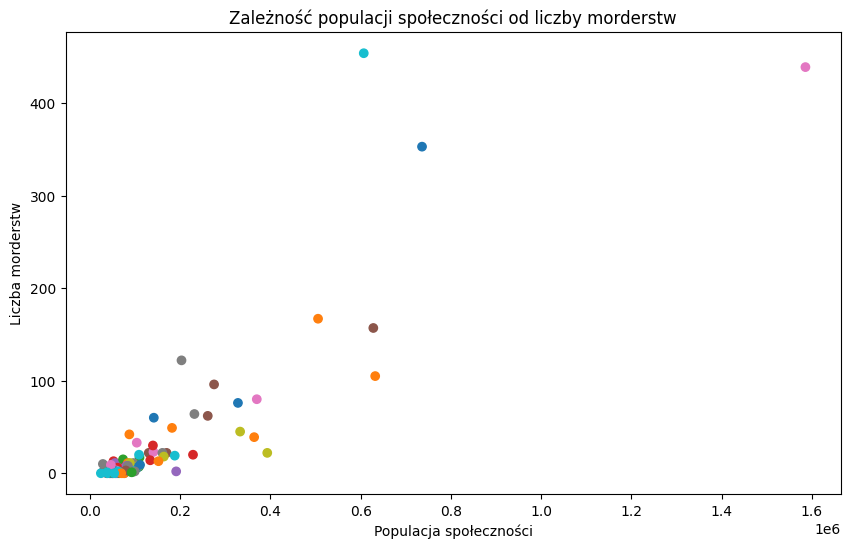

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(x=data_subset['population'], y=data_subset['murders'], c=data_subset['communityname'].astype('category').cat.codes, cmap='tab10')

ax.set_title('Zależność populacji społeczności od liczby morderstw')
ax.set_xlabel('Populacja społeczności')
ax.set_ylabel('Liczba morderstw')

plt.show()



##Zrób wykres zależności mordersw od dochodu na gospodarsto, inne kolory dla danego stanu (Użyj [DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html))

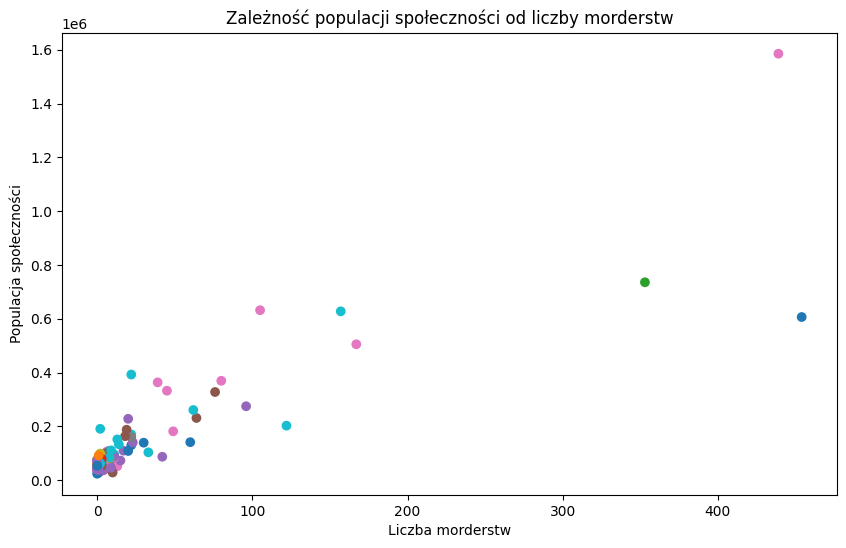

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(x=data_subset['murders'], y=data_subset['population'], c=data_subset['state'].astype('category').cat.codes, cmap='tab10')

ax.set_title('Zależność populacji społeczności od liczby morderstw')
ax.set_xlabel('Liczba morderstw')
ax.set_ylabel('Populacja społeczności')


plt.show()


## Zobrazuj zależność częstotliwośći występowania morderstw/włamań/podpaleń w zależności od dochodu na gospodarstwo (użyj [DataFrame.plot.hist](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.hist.html))
Pomanipuluj parametrem *bins*. Do czego on służy? Czym histogram różni się od scatter plot? Do czego może się przydać?

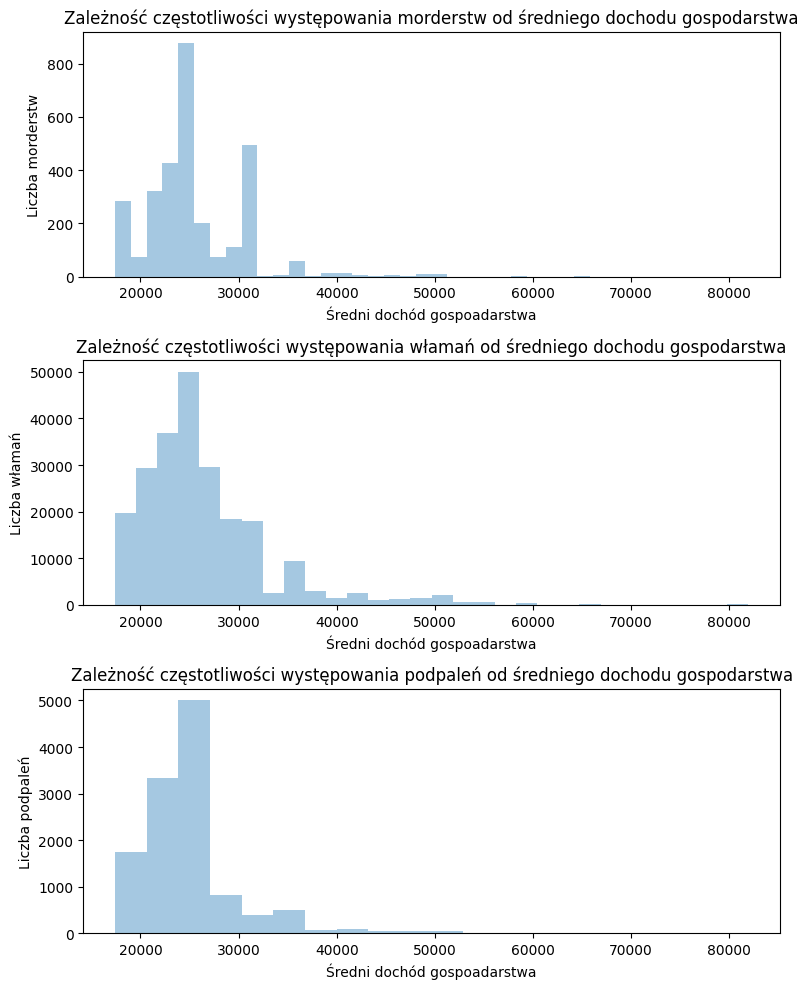

In [97]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

axes[0].hist(data_subset['medIncome'], bins=40, alpha=0.4, label='Morderstwa', weights=data_subset['murders'])
axes[0].set_title('Zależność częstotliwości występowania morderstw od średniego dochodu gospodarstwa')
axes[0].set_xlabel('Średni dochód gospoadarstwa')
axes[0].set_ylabel('Liczba morderstw')

axes[1].hist(data_subset['medIncome'], bins=30, alpha=0.4, label='Włamania', weights=data_subset['burglaries'])
axes[1].set_title('Zależność częstotliwości występowania włamań od średniego dochodu gospodarstwa')
axes[1].set_xlabel('Średni dochód gospoadarstwa')
axes[1].set_ylabel('Liczba włamań')

axes[2].hist(data_subset['medIncome'], bins=20, alpha=0.4, label='Podpaleń',weights=data_subset['arsons'])
axes[2].set_title('Zależność częstotliwości występowania podpaleń od średniego dochodu gospodarstwa')
axes[2].set_xlabel('Średni dochód gospoadarstwa')
axes[2].set_ylabel('Liczba podpaleń')

plt.tight_layout()
plt.show()

#Parametr bins służy do kotrolii wielkości przedziałów. Im większy 'bins', tym większa wielkość przedziału i większa precyzja.
#Zmniejszenie liczby 'bin's spowoduje łączenie większej liczby danych w pojedynczych przedziałach, co sprawi, że histogram będzie bardziej gładki.
#Histogram i scatter plot są różnymi typami wykresów, które służą do różnych celów analizy danych. Histogram służy do analizy rozkładu jednej zmiennej, podczas gdy scatter plot jest używany do analizy zależności między dwiema zmiennymi.
#Histogram jest w formie kolumn, natomiast scatter w formie punktów na wykresie.

## Zrób wykres typu [barplot](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html) (lub [barplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html) dla Pandas) dla różnych stanów (oś pozioma) i średniej ilości morderstw wysokość słupka

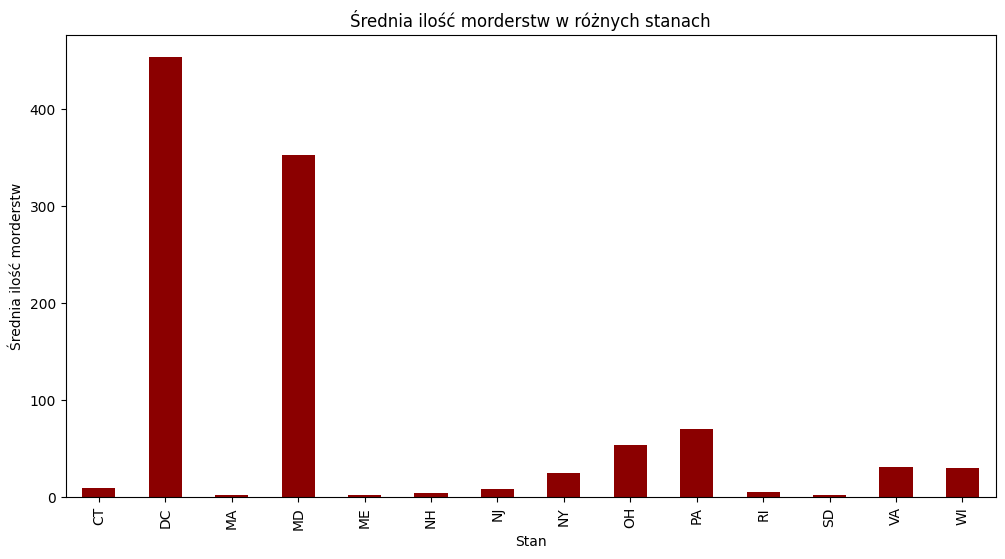

In [88]:
state_murder_avg = data_subset.groupby('state')['murders'].mean()
plt.figure(figsize=(12, 6))
state_murder_avg.plot(kind='bar', color='darkred')
plt.title('Średnia ilość morderstw w różnych stanach')
plt.xlabel('Stan')
plt.ylabel('Średnia ilość morderstw')
plt.show()

## Zrób wykres typu [boxplot](https://matplotlib.org/gallery/pyplots/boxplot_demo.html) (lub [boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) dla Pandas) dla różnych stanów (oś pozioma) i ilości morderstw

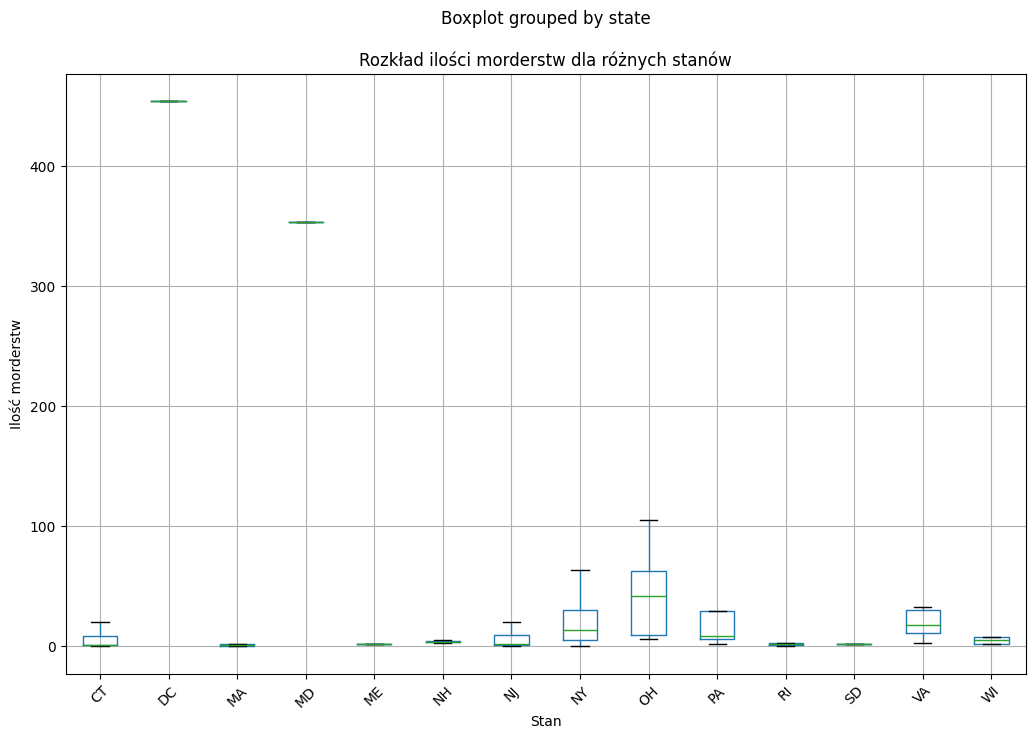

In [89]:

data_subset.boxplot(column='murders', by='state', figsize=(12, 8), showfliers=False)

plt.title('Rozkład ilości morderstw dla różnych stanów')
plt.xlabel('Stan')
plt.ylabel('Ilość morderstw')

plt.xticks(rotation=45)

plt.show()


## Dodaj nową cechę do zbioru danych określajacą ilość morderst przypadajacych na jednego policjanta w populacji

In [108]:
data_subset['murders_per_police'] = data_subset['murders'] / (data_subset['PolicPerPop']*((data_subset['population'])/100000))

data_subset.head()


,communityname,state,countyCode,population,murders,robberies,assaults,burglaries,autoTheft,arsons,PolicPerPop,medIncome,murdPerPop,murders_per_police
54,Toledocity,OH,95.0,332943,45,1594.0,1195.0,5502.0,4517.0,357.0,210.8,24819,13.89,0.064117
55,Philadelphiacity,PA,101.0,1585577,439,11531.0,6821.0,15117.0,23785.0,2282.0,426.4,24603,28.70,0.064932
58,Lynchburgcity,VA,680.0,66049,3,107.0,351.0,560.0,184.0,50.0,205.5,23726,4.47,0.022103
99,NewHaventown,CT,9.0,130474,22,1238.0,1154.0,3417.0,1873.0,134.0,326.1,25811,18.39,0.051707
122,Springfieldcity,OH,23.0,70487,6,208.0,786.0,963.0,457.0,6.0,142.9,21407,8.49,0.059568


## Dodatkowa analiza zbioru danych
Zgodnie z opisem, zbiór danych ma służyć wykrywaniu ilość przestępstw na 100k mieszczkańców.
Ten parametr dla danych w zbiorze danych wystepuje na samym końcu (*ViolentCrimesPerPop*).
Jak wybrać atrybuty, które będą przydatne w przewidywaniu tego parametru dla nowych społzeczności?
Czy może najlepiej zawsze korzystać ze wszystkich możliwych atrybutów?
Pobaw sie danymi i pomyśl jak można wybrać cechy/atrybuty, które będą najbardziej przydatne.
**Czy są atrybuty, które na pewno warto wyrzucić?**


In [ ]:
#Należy uwzględnić najważniejsze atrybuty, które mają korelacje z 'ViolentCrimesPerPop', czy np. atrybut populacji i przęstępstawa.
#Możemy równiże rozważyć cechy związane z bezrobociem, a także dochodem.
#Należy zidentifikować i rozważyć cechy, które mają dużo wartości odstających, ponieważ mogą one wpłynąć na skuteczność modelu.
#Atrybuty, które można rozważyć jako kandydatów do usunięcia, to te, które nie mają logicznego związku z przestępczością lub demografią społeczności, a także te, które mają dużo brakujących wartości lub dużo wartości odstających.